# Advance Classification Solution
### EDSA - Climate Change Belief Analysis 2022 
#### RecycleStats Solutions - Team 12 EDSA

© Explore Data Science Academy



<a id="cont"></a>
## Table of Content

<a href=#one>1. Introduction</a>

    1.1 Overview
    1.2 Problem Statement
    1.3 Instruction
        1.3.1 Model Version with COMET
        1.3.2 NLTK Corpora Installation
       
<a href=#two>1. Import Packages</a>

<a href=#three>2. Collect Data</a>

<a href=#four>4. Exploratory Data Analysis (EDA)<a>
    
    4.1 Missing Data Check
    4.2 Target Distribution Visualization

<a href=#five>5. Data Processing</a>
    
    5.1 Text Cleaning
        5.1.1 Remove Noise 
        5.1.2 Remove Punctuation
    5.2 Tokenization
    5.3 Count Vectorizer
    5.4 TF-IDF Vectorizer

<a href=#six>6. Modeling</a>
    
    6.1 Naive Bayes Model

<a href=#seven>7. Model Performance</a>
    
    7.1 Model Test Score
    7.2 Model Confusion Matrix

<a href=#eight>8. Saving & Exporting Model</a>

<a href=#nine>9. Best Model Explanations</a>

<a href=#ten>10. Conclusion</a>

<a href=#eleven>11. Recommendation</a>

<a href=#ref>Reference Document Links</a>

<a id="one"></a>
## 1. INTRODUCTION
<a href=#cont>Back to Table of Contents</a>

### 1.1 Overview

Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

Hence, We will be creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.


### 1.2 Problem Statement

We are looking to Empower the marketing sector of Eco-Friendly Companies, helping them maximise productivity, driving profitability by knowledge of the demand & Supply on her goods & Services. 

### 1.3 Instruction

#### 1.3.1 Model Version with COMET
To Begin with, We will be using Comet, a great tool for model versioning and experimentation as it records the parameters and conditions from each of your experiements- allowing you to reproduce your results, or go back to a previous version of your experiment.

If you don't have a commet Accout, Go ahead to create an individual account, visit https://www.comet.ml/  You will see a project folder. That is where the records of your experiments can be viewed.

You should install as illustrated below if you don't already have it. Always import Experiment at the top of your notebook/script. (Always install if on Google Colab).

In [2]:
# Install Comet
!pip install comet_ml

In [3]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="CL3r4k2Kr1MFTRdavZUxjrBSy",
    project_name="team-12-advanced-classification-sentiment-analysis",
    workspace="jeniffermukami",
)

COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/jeniffermukami/team-12-advanced-classification-sentiment-analysis/0eca29e32f064e949985ae54712a4b96



####  1.3.2 Ensure you've got NLTK Corpora installed
Some of the `nltk` text processing involve a lookup operation. For example, to find all [stopwords](https://www.geeksforgeeks.org/removing-stop-words-nltk-python/) in a given string of text, we require a list of all possible stopwords in the English language to use for the lookup. Such a list is refered to as a [corpus](https://en.wikipedia.org/wiki/Text_corpus). Therefore, first download the corpora we're going use if you don't have it installed, otherwise we may get a lookup error! Watch out specifically for the `tokenize` and `stopwords` sections. Not to worry, as we can easily avoid these errors by downloading the [corpora](http://www.nltk.org/nltk_data/) using the `nltk` downloader tool:

You should see this pop-up box. 

**NOTE:** the box might pop-up in the backround, in which case you should use `alt + tab` to switch to the downloader window.

<img src="https://github.com/Explore-AI/Pictures/blob/master/nltk_downloader.png?raw=true" width=50%/> 

Use it to navigate to the item we need to download: 
- stopwords corpus (Corpora tab)
- punkt tokenizer models (Models tab)

Navigate to these, click the download button, and exit the downloader when finished.

So, Let's Proceed

<a id="two"></a>
## 2. IMPORT PACKAGES
<a href=#cont>Back to Table of Contents</a>

In this section, we will be importing libraries which are a collections of modules in their classes and based on their functionality. For this Analysis and Modelling, we wil be requiring;

   ` For Data Manupulation, libraries such as Pandas, Numpy etc.`
   
`For Data Visualization, libraries such as mathplotlib, seaborn`
    
`libraries for data prepartion, feature selection, model building, Performance Calculation and more.`

**SEE** in-line comments BELOW for purpose per importation.

In [4]:
'''
if you don't have installed, the NLTK corpora, Remove Hashtag below and Run 
IF NOT, just run the import file.
'''
import nltk

#nltk.download()

In [6]:
""" For seamless run, Import All required libraries here """

# Libraries for data loading, data manipulation and data visulisation
import pandas as pd                                                   # for loading CSV data
import numpy as np                                                    # Used for mathematical operations
import matplotlib.pyplot as plt                                       # for Graphical Representation
%matplotlib inline                                                    
import seaborn as sns                                                 # for specialized plots
import re                                                             
import math                                                           
sns.set()                                                             # set plot style

# Libraries for data preparation
from nltk.corpus import stopwords                                     
import string                                                         
from nltk.tokenize import TweetTokenizer, regexp_tokenize                                                          
from nltk import RegexpTokenizer                                      
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer                    
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer     
from nltk.stem import WordNetLemmatizer                               
from nltk.util import ngrams                                          
from statsmodels.graphics.correlation import plot_corr                # To plot correlation heatmap

# Libraries for Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer   

# Libraries for Model Building
from sklearn.model_selection import train_test_split                  # To split the data into training and testing data
from sklearn.naive_bayes import MultinomialNB

# Libraries for calculating performance metrics
from sklearn import metrics                                           # for
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Libraries to Save/Restore Models
import pickle

# Setting global constants to ensure notebook results are reproducible


import warnings
warnings.filterwarnings('ignore')

<a id="three"></a>
## 3. Collect Data
<a href=#cont>Back to Table of Contents</a>

Data is required to help you find a solution to your data science problem. The data will provide insights that will lead you to a solution.

The collection of the data used for this analysis was funded by a Canada Foundation for Innovation JELF Grant to Chris Bauch, University of Waterloo, and made available by the EXPLORE Data Science Academy (EDSA) in challenging us during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data. 

The dataset aggregates tweets pertaining to climate change collected between Apr 27, 2015 and Feb 21, 2018. In total, 43943 tweets were collected.

In [7]:
# Load Data
df_train = pd.read_csv('train.csv')
df_test =pd.read_csv('test_with_no_labels.csv')

In [8]:
# View Dataset
df_train.head()

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954


In [9]:
# Lets see the shape of our Dataset.
print(f'No. of Tweets on our TRAIN dataset: {df_train.shape}')
print(f'No. of Tweets on our TEST dataaet: {df_test.shape}')

No. of Tweets on our TRAIN dataset: (15819, 3)
No. of Tweets on our TEST dataaet: (10546, 2)


In [10]:
# printing a list of all sentiment types we have in our data.
type_labels = list(df_train.sentiment.unique())
print(type_labels)

[1, 2, 0, -1]


We have available for training and Test our model, `15819 Tweets` & `10546 Tweets` respectively as seen above. Each tweet labelled, represents one of the following classes:

Class Description
*  2 **News:**     The tweet links to factual news about climate change
*  1 **Pro:**      The tweet supports the belief of man-made climate change
*  0 **Neutral:**  The tweet neither supports nor refutes the belief of man-made climate change
* -1 **Anti:**     The tweet does not believe in man-made climate change

Variable definitions
- **sentiment:** Sentiment of tweet
- **message:**   Tweet body
- **tweetid:**   Twitter unique id

<a id="four"></a>
## 4. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

This includes looking to understand patterns in our data, pinpoint any outliers and indicate relationships between variables. This phase includes descriptive statistics and data visualisations.

Hence, let's proceed to carrying out some EDA

#### 4.1 Missing Data Check
At the training phase it's important your dataset is ideal as possible, meaning things like; NO MISSING DATA in each observation.

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


The info command reveals presence of `Categorical` and `Numerical` features in our dataset, and as expected the message feature is categorical while the tweetid and sentiment are numerical. All features seem to have `Zero Non-Null` values. let's check to confirm count of null values present in each feature.

In [10]:
df_train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

This Confirms; `No Missing Values in our Dataset`

#### 4.2 Target Distribution Visualization

Let's Visualize the distribution of our Target Response within our Training DataSet i.e. how many data samples we have for each of the different sentiment types

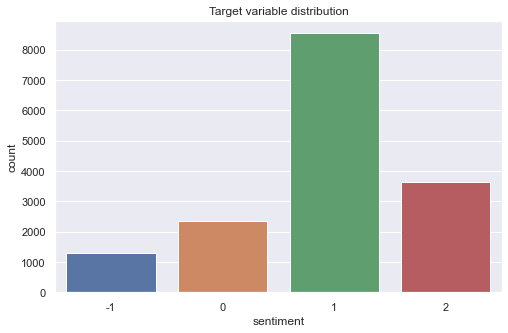

In [11]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(df_train['sentiment'])
plt.title('Target variable distribution')
plt.show()

From the bar graph above it can be seen that most people believe in climate change,while only a few fail to believe in man-made climate change.Our data is imbalanced which is a problem because algorithms wants balanced data,unequal distribution means the classifier is exposed to far more observation from class label 1 and far less observations from classlabel -1 ,This will mean hat the classifier will be better in making predictions in tweet messages from class label 1than those in class label-1.

<a id="five"></a>
## 5. DATA PROCESSING
<a href=#cont>Back to Table of Contents</a>

Let's get the data and clean it up a bit

### 5.1 Text Cleaning

#### 5.1.1 Remove Noise
In text analytics, removing noise (i.e. unneccesary information) is a key part of getting the data into a usable format

For our data set we will follow the following steps 
 * removing Removing hashtags, mentions, and links
 * making everything lower case
 * removing punctuation

In [12]:
# View Data
df_train.head(10)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,1,RT @makeandmendlife: Six big things we can ALL...,992717
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,1,RT @paigetweedy: no offense… but like… how do ...,260471


In [13]:
# So let's remove url
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
df_train['message'] = df_train['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [14]:
# Let's view the MESSAGE created
df_train['message'] 

0        PolySciMajor EPA chief doesn't think carbon di...
1        It's not like we lack evidence of anthropogeni...
2        RT @RawStory: Researchers say we have three ye...
3        #TodayinMaker# WIRED : 2016 was a pivotal year...
4        RT @SoyNovioDeTodas: It's 2016, and a racist, ...
                               ...                        
15814    RT @ezlusztig: They took down the material on ...
15815    RT @washingtonpost: How climate change could b...
15816    notiven: RT: nytimesworld :What does Trump act...
15817    RT @sara8smiles: Hey liberals the climate chan...
15818    RT @Chet_Cannon: .@kurteichenwald's 'climate c...
Name: message, Length: 15819, dtype: object

#### 5.1.2 Remove Punctuation 

Haven removed some unnecessary information (i.e info not entirely useful to training our desired outcome), we need make all the text lower case to remove some noise from capitalisation.

In [15]:
# first DeCaptilize our message (Convert to lowercase)
df_train['message'] = df_train['message'].str.lower()

In [16]:
# Define a function to handle punctuation removal
def remove_punctuation(post):
    return ''.join([l for l in post if l not in string.punctuation])

In [17]:
# Remove Punctutaion Noise
df_train['message'] = df_train['message'].apply(remove_punctuation)

In [18]:
# Verify Actions
df_train.head(10)

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt rawstory researchers say we have three year...,698562
3,1,todayinmaker wired 2016 was a pivotal year in...,573736
4,1,rt soynoviodetodas its 2016 and a racist sexis...,466954
5,1,worth a read whether you do or dont believe in...,425577
6,1,rt thenation mike pence doesn’t believe in glo...,294933
7,1,rt makeandmendlife six big things we can all d...,992717
8,1,aceofspadeshq my 8yo nephew is inconsolable he...,664510
9,1,rt paigetweedy no offense… but like… how do yo...,260471


### 5.2 Tokenization

In [19]:
# Apply the tweet tokenization
tt = TweetTokenizer()
df_train['message'].apply(tt.tokenize)

0        [polyscimajor, epa, chief, doesnt, think, carb...
1        [its, not, like, we, lack, evidence, of, anthr...
2        [rt, rawstory, researchers, say, we, have, thr...
3        [todayinmaker, wired, 2016, was, a, pivotal, y...
4        [rt, soynoviodetodas, its, 2016, and, a, racis...
                               ...                        
15814    [rt, ezlusztig, they, took, down, the, materia...
15815    [rt, washingtonpost, how, climate, change, cou...
15816    [notiven, rt, nytimesworld, what, does, trump,...
15817    [rt, sara, 8smiles, hey, liberals, the, climat...
15818    [rt, chetcannon, kurteichenwalds, climate, cha...
Name: message, Length: 15819, dtype: object

In [20]:
df_train.head()

,sentiment,message,tweetid
0,1,polyscimajor epa chief doesnt think carbon dio...,625221
1,1,its not like we lack evidence of anthropogenic...,126103
2,2,rt rawstory researchers say we have three year...,698562
3,1,todayinmaker wired 2016 was a pivotal year in...,573736
4,1,rt soynoviodetodas its 2016 and a racist sexis...,466954


##### Repeat Text Cleaning for Test DataSet
NOTE: All functions applied have already been defined while cleaning our Train Data.

In [21]:
# Removing Noise
df_test['message'] = df_test['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [22]:
# Convert Capitals, Remove Punctuations
df_test['message'] = df_test['message'].str.lower()
df_test['message'] = df_test['message'].apply(remove_punctuation)

In [23]:
# Tokenisation
df_test['message'].apply(tt.tokenize)

0        [europe, will, now, be, looking, to, china, to...
1        [combine, this, with, the, polling, of, staffe...
2        [the, scary, unimpeachable, evidence, that, cl...
3        [karoli, morgfair, osborneink, dailykos, putin...
4        [rt, fakewillmoore, female, orgasms, cause, gl...
                               ...                        
10541    [rt, brittanybohrer, brb, writing, a, poem, ab...
10542    [2016, the, year, climate, change, came, home,...
10543    [rt, loopvanuatu, pacific, countries, positive...
10544    [rt, xanria, 00018, you, ’, re, so, hot, you, ...
10545    [rt, chloebalaoing, climate, change, is, a, gl...
Name: message, Length: 10546, dtype: object

There are other forms of text cleaning that are important to be applied, such as;

    STEMMING is the process of transforming to the root word. It uses an algorithm that removes common word-endings from English words, such as “ly,” “es,” “ed,” and “s”. Some methods includes `Porter`, `Lancaster`, `Snowball`.
    
    LEMMATIZATION similar to stemming, it processes by grouping words of similar meaning together. In other words, your root STEM(the word you ended up with), is not something you can just look up in a dictionary, often called LEMMA.
    
    STOPWORD words which do not contain important significance to be used in Search Queries `e.g as, and, if`. Usually these words are filtered out from search queries because they return a vast amount of unnecessary information.
    
NOW thanks to Python...

sklearn has a built in text feature extraction module called `CountVectorizer` that will literally do all of that work in one line of code! This function will convert a collection of documents (rows of text) into a matrix of token counts.

So let's go ahead to apply the CountVectorizer.


### 5.3 Count Vectorizer

Let's first split our dataset because................(FILL IN: EXPERIEMENT what happens if we CountVectorize before splitting, what happens)

In [16]:
# Get features and label 
X = df_train['message']
y = df_train['sentiment']

# split data to Train/Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state = 53)

Before we move on, let's take a look at the distribution of observations between our classes.

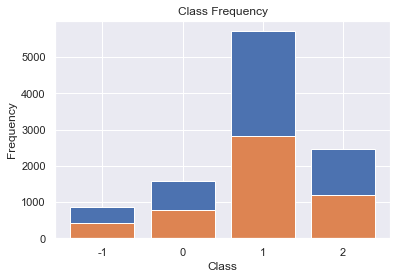

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [17]:
unique, counts = np.unique(y_train, return_counts=True)
plt.bar(unique, counts)
unique, counts = np.unique(y_test, return_counts=True)
plt.bar(unique, counts)

plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[2,1,0,-1], labels=[2,1,0,-1])

plt.show()
y.value_counts()

**Observed very high level of Class imbalance here: there are 8530 observations in class 1 and only 1296 in class -1.**

We have to deal with this imbalance as this will affect the predictivity of our model

let's proceed to initializing and fitting a tuned CountVectorizer to the Train data.

In [18]:
# initilize count vectorizer
betterVect = CountVectorizer(stop_words='english', 
                             min_df=2, 
                             max_df=0.5, 
                             ngram_range=(1, 1))

In [19]:
#transform the split training data using only the 'message' column values
count_train =betterVect.fit_transform(X_train.values)

#transform the split test data using only the 'message' column values
count_test=betterVect.transform(X_test.values)

# Repeat for Main Test Data
counteer_test = betterVect.transform(df_test['message'])

In [20]:
# print the first 10 features of the count_vectorizer
print(betterVect.get_feature_names()[:100])

['00', '000', '01', '05', '10', '100', '1000', '100000', '101', '105', '10c', '10yrs', '11', '110', '115', '12', '125', '13', '14', '145', '15', '150', '16', '17', '170', '175', '18', '19', '1900', '195', '1957', '1963', '1968', '1970', '1990', '1991', '1followernodad', '1hqã', '1o5c', '1st', '1starfleetcadet', '20', '200', '2000', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '202', '2020', '2030', '2045', '2050', '20bn', '21', '2100', '21cf', '21logician', '21st', '22', '224', '23', '24', '25', '25th', '26', '27', '28', '280', '285tkcsxalã', '29', '2bfj4wlã', '2c', '2day', '2nd', '30', '300', '30pm', '31', '3121', '32', '320', '322', '33', '34', '35', '350', '36', '37', '3dsls1o92v', '3novices', '3rd', '3w5uuhkm89']


### 5.4 TF-IDF Vectorizer

TF-IDF which stands for `Term Frequency-Inverse Document Frequency`.It is a commonly used NLP (Natural Language Processing) model that helps you determine the most important words in each document in the corpus.The idea behind TFIDF is that each corpus may have shared words beyond just the stopwords.These common words are like stop words and should be removed or atleast downweighted in importance.

In [21]:
# initilize TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_df =0.7)

In [22]:
# Transform train & test data
tfidf_train =tfidf.fit_transform(X_train)
tfidf_test =tfidf.transform(X_test)

# Repeat for test data
tfidf_test =tfidf.transform(X_test)

In [23]:
# print the first 10 features of the TF-IDF Vectorizer
print(tfidf.get_feature_names()[:100])

['00', '000', '00005', '000yr', '001', '009barca', '00ntxopnko', '00sskwonxu', '01', '02', '02c3wii4lt', '02cents0', '02gmwhumvq', '03', '039', '03ezntbl0c', '03szjho5n2', '05', '05vl8r1twg', '06', '06dmre71re', '06uhpgk1bq', '07', '09gsdnfesc', '0a', '0abkpmovfo', '0agi94rozy', '0bama', '0bfggqjr5r', '0bjzdzlqau', '0bug0tazdy', '0bwvikyhub', '0c', '0c2gojtcut', '0c7mlzqkfi', '0cdue', '0cfga6vqlg', '0czl6l32uj', '0dhrt6gyyc', '0dj8utgr1k', '0dszp', '0dv5b96ndp', '0dwfl5ooaj', '0eyg7yxdzh', '0fce64mnxr', '0ftj16awzg', '0gatmsmvze', '0gciahsnbn', '0gfki3o4lx', '0gumn3nkw3', '0hecsudfdi', '0hix5ndm8r', '0isozol1ja', '0j1b1usnug', '0jacnlwhl5', '0jhhnmaya6', '0kkc0vpaqk', '0kv4k30yau', '0l01vqckpk', '0lgpp7gvpu', '0llvliucnt', '0m2umhis9f', '0mcwwb', '0mgi2tlenn', '0mmah54g51', '0mmoksolgz', '0mp2', '0mqfntdoeu', '0mr6t7uovh', '0n37ehhiyb', '0nc1yed3xf', '0otgnp60dc', '0owwyxjf89', '0pbtal8urk', '0pk', '0potbhtuc1', '0qgitoy8n0', '0qrwirdwqr', '0r5qonnamt', '0rhsv3v9jj', '0soulpembx', '0sv

In [32]:
#print the first 20 vectors of tfidf training data
print(tfidf_train.A[:10])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [33]:
# create tfidf vectorizer df
tfidf_df = pd.DataFrame(tfidf_train.A, columns=tfidf.get_feature_names())
print(tfidf_df.head())

   000005  009barca  010536  012   02  02cents0  0519am   07  094  0bamas  \
0     0.0       0.0     0.0  0.0  0.0       0.0     0.0  0.0  0.0     0.0   
1     0.0       0.0     0.0  0.0  0.0       0.0     0.0  0.0  0.0     0.0   
2     0.0       0.0     0.0  0.0  0.0       0.0     0.0  0.0  0.0     0.0   
3     0.0       0.0     0.0  0.0  0.0       0.0     0.0  0.0  0.0     0.0   
4     0.0       0.0     0.0  0.0  0.0       0.0     0.0  0.0  0.0     0.0   

   ...   เล  และ   ได  と通知した  どうなる米国  スタリん時代のソ連や毛沢東の文化大革命並のサイエンスに政治的介入だ  \
0  ...  0.0  0.0  0.0    0.0     0.0                                0.0   
1  ...  0.0  0.0  0.0    0.0     0.0                                0.0   
2  ...  0.0  0.0  0.0    0.0     0.0                                0.0   
3  ...  0.0  0.0  0.0    0.0     0.0                                0.0   
4  ...  0.0  0.0  0.0    0.0     0.0                                0.0   

   地球温暖化会議  気候変動との表現を削除しないと予算を貰えない  申請書のアブストラクトに  米国政府はある研究者に連絡して  
0      0.0        

Forget about thhe chinese, it's well understandable English text ready to be feed to our model.

<a id="six"></a>
## 6. Modeling
<a href=#cont>Back to Table of Contents</a>



### 6.1. Naive Bayes Model

Naive bayes is most commonly used for testing NLP classification because of its basis in probability. Naive bayes algorithm attempts to answer the question 'Given a particular piece of data how likely is the outcome?'

Each word acts as a feature from our count vectorizer helping classify our message using probability.

There are three types of Naive Bayes model under the scikit-learn library:

    Gaussian: It is used in classification and it assumes that features follow a normal distribution.

    Multinomial: It is used for discrete counts. For example, let’s say,  we have a text classification problem. Here we can consider Bernoulli trials which is one step further and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as “number of times outcome number x_i is observed over the n trials”.

    Bernoulli: The binomial model is useful if your feature vectors are binary (i.e. zeros and ones). One application would be text classification with ‘bag of words’ model where the 1s & 0s are “word occurs in the document” and “word does not occur in the document” respectively.

We choose the Multinomial Naive Bayes (MultinomialNB) Model because of how well it works with count vectorizer as it expects integer inputs.


In [24]:
# initialize classifier
nb_classifier = MultinomialNB()

# Training Model with CountVector
nb_classifier.fit(count_train, y_train)

MultinomialNB()

In [26]:
# Predicting for Counter Vectorizer
nb_preds = nb_classifier.predict(count_test)


<a id="seven"></a>
## 7. MODEL PERFORMANCE
<a href=#cont>Back to Table of Contents</a>



### 7.1 Model Testing Scores


In [28]:
labels = ['1: News', '2: Pro', '0: Neutral', '-1: Anti']
print('Classification Report')
print(classification_report(y_test, nb_preds, target_names=labels))

Classification Report
              precision    recall  f1-score   support

     1: News       0.65      0.40      0.50       434
      2: Pro       0.56      0.41      0.47       782
  0: Neutral       0.75      0.82      0.78      2817
    -1: Anti       0.69      0.76      0.72      1188

    accuracy                           0.71      5221
   macro avg       0.66      0.60      0.62      5221
weighted avg       0.70      0.71      0.70      5221



In [34]:
f1 =metrics.f1_score(y_test, nb_preds, average='micro')
f1

0.7096341696992913

In [29]:
print(f'Accuracy Score: {round(metrics.accuracy_score(y_test, nb_preds), 2) * 100}''%')

Accuracy Score: 71.0%


### 7.2 Model Confusion matrix

In [30]:
labels = ['1: News', '2: Pro', '0: Neutral', '-1: Anti']
pd.DataFrame(data=confusion_matrix(y_test, nb_preds), index=labels, columns=labels)

,1: News,2: Pro,0: Neutral,-1: Anti
1: News,174,65,170,25
2: Pro,33,321,350,78
0: Neutral,40,167,2312,298
-1: Anti,21,25,244,898


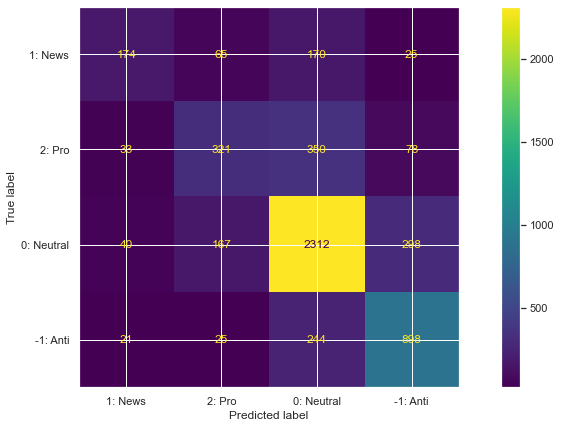

In [31]:
# Confusion matrix
labels = ['1: News', '2: Pro', '0: Neutral', '-1: Anti']
cm = confusion_matrix(y_test, nb_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(15,7))
disp.plot(ax=ax)
plt.show()

<a id="eight"></a>
## 8. SAVING & EXPORTING MODEL
<a href=#cont>Back to Table of Contents</a>

In [40]:
tester = nb_classifier.predict(counteer_test)

save_df = pd.DataFrame(tester, columns=['sentiment'])

In [41]:
output=pd.DataFrame({'tweetid': df_test['tweetid']})
submission=output.join(save_df)

In [42]:
#submission.to_csv('submission.csv',index=False)

In [43]:
# View Exported CSV file
#submission.head(10)

#### Applying tfidf Vectors
To avoid Error due to DIMENSION MISMATCH, let's test our tfidf Vector Here. 

In [44]:
# Training Model with tfidf Vector
nb_classifier.fit(tfidf_train, y_train)

# Predicting for tfidf Vectorizer
pred_tfidf_mnb = nb_classifier.predict(tfidf_test)

In [45]:
labels = ['1: News', '2: Pro', '0: Neutral', '-1: Anti']
print('Classification Report')
print(classification_report(y_test, pred_tfidf_mnb, target_names=labels))

Classification Report
              precision    recall  f1-score   support

     1: News       1.00      0.02      0.03       434
      2: Pro       1.00      0.07      0.13       782
  0: Neutral       0.61      0.98      0.75      2817
    -1: Anti       0.86      0.43      0.57      1188

    accuracy                           0.64      5221
   macro avg       0.87      0.37      0.37      5221
weighted avg       0.76      0.64      0.56      5221



In [46]:
print(f'Accuracy Score: {round(metrics.accuracy_score(y_test, pred_tfidf_mnb), 2) * 100}''%')

Accuracy Score: 64.0%


### Logging results to comet

In [32]:
#saving metrics for logging
accuracy = metrics.accuracy_score(y_test,nb_preds)
accuracy

0.7096341696992913

In [35]:

params ={"random_state":53,
        "model_type ":"Naive_bayes"}

nb_metrics ={"Accuracy":accuracy,
            "f1_score":f1}


In [36]:
#log parameters and results
experiment.log_parameters(params)
experiment.log_metrics(nb_metrics)

In [37]:
experiment.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/jeniffermukami/team-12-advanced-classification-sentiment-analysis/0eca29e32f064e949985ae54712a4b96
COMET INFO:   Metrics:
COMET INFO:     Accuracy : 0.7096341696992913
COMET INFO:     f1_score : 0.7096341696992913
COMET INFO:   Parameters:
COMET INFO:     alpha         : 1.0
COMET INFO:     class_prior   : 1
COMET INFO:     fit_prior     : True
COMET INFO:     model_type    : Naive_bayes
COMET INFO:     neg_label     : 0
COMET INFO:     norm          : l2
COMET INFO:     pos_label     : 1
COMET INFO:     random_state  : 53
COMET INFO:     smooth_idf    : True
COMET INFO:     sparse_output : False
COMET INFO:     sublinear_tf  : False
COMET INFO:     use_idf       : True
COMET INFO:   Uploads:
COMET INFO:     conda-environment-definition : 1
COMET 

In [ ]:
experiment.display()

<a id="nine"></a>
## 9. BEST MODEL EXPLANATION
<a href=#cont>Back to Table of Contents</a>



Clearly the Model created using CoutVectorizer is much better than that of tfidf Vectors

<a id="ten"></a>
## 10. Conclusion
<a href=#cont>Back to Table of Contents</a>

...........................

<a id="eleven"></a>
## 11. Recommendation
<a href=#cont>Back to Table of Contents</a>

<a id="ref"></a>
## Reference Links
<a href=#cont>Back to Table of Contents</a>

* [GitHub Collab Ref.](https://github.com/)
* [Commet Collab Ref](https://www.comet.ml/) 
* [Kaggle Collab Ref](https://www.kaggle.com/c/edsa-climate-change-belief-analysis-2022/overview)